## 1. MLE

Derivation of the maximum likelihood estimates and their covariance matrix:

$$\ln \mathcal{L} = \frac{1}{2} \sum_{i=1}^N (y_i - a -b x_i)^2$$

$$\frac{\partial \mathcal{L}}{\partial a} = - \sum_i (y_i - a - b x_i)$$

$$\frac{\partial \mathcal{L}}{\partial b} = - \sum_i x_i (y_i - a - b x_i)$$

The MLEs $\hat{a}$, $\hat{b}$ are such that $\left. \frac{\partial \mathcal{L}}{\partial a} \right|_{\hat{a},\hat{b}} = \left. \frac{\partial \mathcal{L}}{\partial b} \right|_{\hat{a},\hat{b}} = 0$

$$\left\{ \begin{matrix} 
\sum_i (y_i - a -b x_i) = 0 \\
\sum_i x_i (y_i - a -b x_i) = 0
\end{matrix} \right.$$

Using the sample mean notation $\overline{X} \equiv \frac{1}{N} \sum_{i=1}^N X_i$:

$$\left\{ \begin{matrix} 
a = \overline{y} - b \overline{x} \\
\overline{xy} - a \overline{x} - b \overline{x^2} = 0
\end{matrix} \right.$$

$$\left\{ \begin{matrix} 
a = \overline{y} - b \overline{x} \\
\overline{xy} - \overline{x} \cdot \overline{y} + b \overline{x^2} - b \overline{x}^2 = 0
\end{matrix} \right.$$

Finally: 
$$\left\{ \begin{matrix} 
\hat{a} = \overline{y} - b \overline{x} \\
\hat{b} = \frac{\overline{xy} - \overline{x} \cdot \overline{y}}{\overline{x^2} - \overline{x}^2}
\end{matrix} \right.$$

Now the covariance matrix:

$$V = \left\{ \left. \left( - \frac{\partial^2 \ln \mathcal{L}}{\partial \theta_i\theta_j} \right) \right| \right\}^{-1}$$

$$V = \begin{pmatrix}
N & N \overline{x} \\
N \overline{x} & N \overline{x^2}
\end{pmatrix}^{-1}$$

$$V = \frac{1}{N} \frac{1}{\overline{x^2} - \overline{x}^2} \begin{pmatrix}
\overline{x^2} & - \overline{x} \\
- \overline{x} & 1
\end{pmatrix}$$

Note: since the matrix of the second derivatives of $\ln \mathcal{L}$ happens to not depend on $a$ and $b$, the usual approximation to replace the true values of the parameters with their esimators in the evaluation of these second derivatives is not needed here, and the result is exact. In addition, $V$ is found to not depend on the measured data $\{y_i\}$ in the case studied here.

In [1]:
import numpy as np

# 1. MLE
def lnL(xx,yy,a,b):
    s = 0
    for i in range(0,len(xx)):
        s = s + (yy[i]-a-b*xx[i])**2
    return s

def sl_MLE(xx,yy):
    xy = xx * yy
    xx2 = xx * xx
    mean_x = np.mean(xx)
    mean_y = np.mean(yy)
    mean_x2 = np.mean(xx2)
    mean_xy = np.mean(xy)
    b = (mean_xy - mean_x*mean_y) / (mean_x2 - mean_x**2)
    a = mean_y - b*mean_x
    return (a,b)

def sl_MLE_var(xx,yy):
    xx2 = xx * xx
    
    A = 1/(len(xx)*(np.mean(xx2)-np.mean(xx)**2))
    V11 = A*np.mean(xx2)
    V12 = -A*np.mean(xx)
    V21 = V12
    V22 = A
    return ((V11,V12),(V21,V22))

# position of the detector hits
xx12 = np.array([10,11,12,20,21,22])
yy12 = np.array([4.0,3.8,3.6,5.2,4.9,4.8])

# sub-arrays with only station 1 or only station 2
xx1 = xx12[[0,1,2]]
xx2 = xx12[[3,4,5]]
yy1 = yy12[[0,1,2]]
yy2 = yy12[[3,4,5]]

print ("first station only: V(MLE) = ", sl_MLE_var(xx1,yy1))
print ("second station only: V(MLE) = ", sl_MLE_var(xx2,yy2))
print ("both stations: V(MLE) = ", sl_MLE_var(xx12,yy12))
mle12 = sl_MLE(xx12,yy12)
print ("MLE for both stations: ", mle12)

mle1 = sl_MLE(xx1,yy1)
mle2 = sl_MLE(xx2,yy2)

first station only: V(MLE) =  ((60.8333333333329, -5.499999999999961), (-5.499999999999961, 0.49999999999999645))
second station only: V(MLE) =  ((220.83333333332706, -10.499999999999702), (-10.499999999999702, 0.4999999999999858))
both stations: V(MLE) =  ((1.8290043290043279, -0.10389610389610382), (-0.10389610389610382, 0.006493506493506489))
MLE for both stations:  (2.648268398268401, 0.10844155844155828)


## 2. draw $-2 \ln \mathcal{L}$

In [2]:
from scipy import optimize
import matplotlib.pyplot as plt

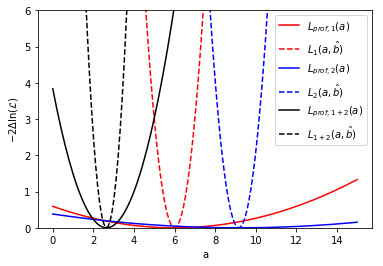

In [3]:
# 2. draw -2 ln L
def lnL_args_ab(x,*args):
    a = x[0]
    b = x[1]
    xx = args[0]
    yy = args[1]
    return lnL(xx,yy,a,b)

def lnL_args_a(x,*args):
    a = args[2]
    b = x
    xx = args[0]
    yy = args[1]
    return lnL(xx,yy,a,b)

lh_vals12 = []
proflh_vals12 = []
lh_vals1 = []
proflh_vals1 = []
lh_vals2 = []
proflh_vals2 = []
a_vals = []

minlh12 = lnL(xx12,yy12,mle12[0],mle12[1])
minlh1 = lnL(xx1,yy1,mle1[0],mle1[1])
minlh2 = lnL(xx2,yy2,mle2[0],mle2[1])

a_vals = np.linspace(0,15,150)
for ai in a_vals:
    # 12
    lh_vals12.append(lnL(xx12,yy12,ai,mle12[1])-minlh12)
    bhathat = optimize.fmin(lnL_args_a,mle12[1],args=(xx12,yy12,ai),disp=False)
    proflh_vals12.append(lnL(xx12,yy12,ai,bhathat)-minlh12)
    # 1
    lh_vals1.append(lnL(xx1,yy1,ai,mle1[1])-minlh1)
    bhathat = optimize.fmin(lnL_args_a,mle1[1],args=(xx1,yy1,ai),disp=False)
    proflh_vals1.append(lnL(xx1,yy1,ai,bhathat)-minlh1)
    # 2
    lh_vals2.append(lnL(xx2,yy2,ai,mle2[1])-minlh2)
    bhathat = optimize.fmin(lnL_args_a,mle2[1],args=(xx2,yy2,ai),disp=False)
    proflh_vals2.append(lnL(xx2,yy2,ai,bhathat)-minlh2)

# plotting
fix, ax = plt.subplots()
ax.plot(a_vals, proflh_vals1, label='$L_{prof,1} (a)$', linestyle='-', color='r')
ax.plot(a_vals, lh_vals1, label='$L_{1} (a,\hat{b})$', linestyle='--', color='r')
ax.plot(a_vals, proflh_vals2, label='$L_{prof,2} (a)$', linestyle='-', color='b')
ax.plot(a_vals, lh_vals2, label='$L_{2} (a,\hat{b})$', linestyle='--', color='b')
ax.plot(a_vals, proflh_vals12, label='$L_{prof,1+2} (a)$', linestyle='-', color='black')
ax.plot(a_vals, lh_vals12, label='$L_{1+2} (a,\hat{b})$', linestyle='--', color='black')
ax.set_ybound(0,6)
ax.set_xlabel('a')
ax.set_ylabel('$-2 \Delta \ln(\mathcal{L})$')
ax.legend()
plt.show()

## 3. Add information
$$\langle b \rangle = 0.1,\quad \sigma_b = 0.05$$

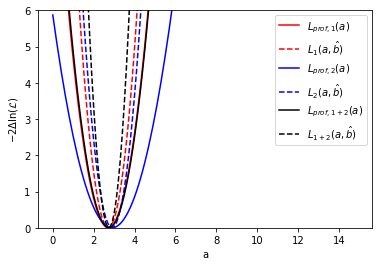

In [4]:
def lnL(xx,yy,a,b):
    s = 0
    for i in range(0,len(xx)):
        s = s + (yy[i]-a-b*xx[i])**2
    s = s + ((b-0.1)/0.05)**2
    return s

def sl_MLE(xx,yy):
    mle = optimize.fmin(lnL_args_ab,(1,1),args=(xx,yy),disp=False)
    return mle

mle12 = sl_MLE(xx12,yy12)
mle1 = sl_MLE(xx1,yy1)
mle2 = sl_MLE(xx2,yy2)

lh_vals12 = []
proflh_vals12 = []
lh_vals1 = []
proflh_vals1 = []
lh_vals2 = []
proflh_vals2 = []
a_vals = []

minlh12 = lnL(xx12,yy12,mle12[0],mle12[1])
minlh1 = lnL(xx1,yy1,mle1[0],mle1[1])
minlh2 = lnL(xx2,yy2,mle2[0],mle2[1])

for i in range(0,150):
    ai = i*0.1
    a_vals.append(ai)
    # 12
    lh_vals12.append(lnL(xx12,yy12,ai,mle12[1])-minlh12)
    bhathat = optimize.fmin(lnL_args_a,mle12[1],args=(xx12,yy12,ai),disp=False)
    proflh_vals12.append(lnL(xx12,yy12,ai,bhathat)-minlh12)
    # 1
    lh_vals1.append(lnL(xx1,yy1,ai,mle1[1])-minlh1)
    bhathat = optimize.fmin(lnL_args_a,mle1[1],args=(xx1,yy1,ai),disp=False)
    proflh_vals1.append(lnL(xx1,yy1,ai,bhathat)-minlh1)
    # 2
    lh_vals2.append(lnL(xx2,yy2,ai,mle2[1])-minlh2)
    bhathat = optimize.fmin(lnL_args_a,mle2[1],args=(xx2,yy2,ai),disp=False)
    proflh_vals2.append(lnL(xx2,yy2,ai,bhathat)-minlh2)

# plotting
fix, ax = plt.subplots()
ax.plot(a_vals, proflh_vals1, label='$L_{prof,1} (a)$', linestyle='-', color='r')
ax.plot(a_vals, lh_vals1, label='$L_{1} (a,\hat{b})$', linestyle='--', color='r')
ax.plot(a_vals, proflh_vals2, label='$L_{prof,2} (a)$', linestyle='-', color='b')
ax.plot(a_vals, lh_vals2, label='$L_{2} (a,\hat{b})$', linestyle='--', color='b')
ax.plot(a_vals, proflh_vals12, label='$L_{prof,1+2} (a)$', linestyle='-', color='black')
ax.plot(a_vals, lh_vals12, label='$L_{1+2} (a,\hat{b})$', linestyle='--', color='black')
ax.set_ybound(0,6)
ax.set_xlabel('a')
ax.set_ylabel('$-2 \Delta \ln(\mathcal{L})$')
ax.legend()
plt.show()

## 4. Data combination

Up to now, we were considering the two parameters $(a,b)$, either for both tracking stations together, or one tracking station at a time. In this question, we focus on $a$ alone, and want to combine the measurements from the two tracking stations, using the BLUE method.

For this, we need the covariance matrix not between $\hat{a}$ and $\hat{b}$, but between the tracking stations 1 and 2, for $\hat{a}$ alone. 

$$W = \text{cov}(\hat{a}_1,\hat{a}_2) = \begin{pmatrix}
(\sigma_1^a)^2 & \sigma_1^a \sigma_2^a \\
\sigma_1^a \sigma_2^a & (\sigma_2^a)^2
\end{pmatrix}$$

How shall we proceed?

* We already know the diagonal elements: they are simply $\sigma(\hat{a}_i)^2$, the $(1,1)$ elements of the covariance matrices we computed in question 1.
* Knowing the off-diagonal elements is a bit more difficult. We make the following decomposition: $W = W_\text{stat} + W_\text{syst,b}$. 
  * $W_\text{stat}$ represents the "statistical only" uncertainty on $\hat{a}$: it corresponds to the uncertainty on $\hat{a}$ when $b$ is fixed to its MLE estimate $\hat{b}$. This is a diagonal matrix: it corresponds to the uncertainty from the measurements in tracking station $i$, assuming $b$ would be perfectly known.
  * $W_\text{syst,b}$ represents the "systematic" uncertainty due to the fact that $b$ is in fact not known. We can expect it to be fully correlated ($\rho = 1$): the true value of $b$ is the same in both tracking stations.
* We then proceed in the following way:
  * The diagonal elements of $W$ are known, as we have seen.
  * $W_\text{stat}$, which is diagonal, is fully known.
  * $W_\text{syst,b}$ follows by $W_\text{syst,b} = W - W_\text{stat}$
    * This gives us directly the diagonal elements.
    * Off-diagonal elements are then obtained knowing that $\rho = 1$.
  * Now we know completely $W_\text{stat}$ and $W_\text{syst,b}$, i.e. we know completely $W$.
* We can now directly apply the BLUE method:

$$a_{12} =  \frac{\sum_{j} \left(W^{-1}\right)_{1j}}{\sum_{i,j} \left(W^{-1}\right)_{ij}} \times a_1
+ \frac{\sum_{j} \left(W^{-1}\right)_{2j}}{\sum_{i,j} \left(W^{-1}\right)_{ij}} \times a_2$$

In [5]:
# 4. BLUE
# we go back to the first likelihood, without constraint on b
def lnL(xx,yy,a,b):
    s = 0
    for i in range(0,len(xx)):
        s = s + (yy[i]-a-b*xx[i])**2
    return s

def sl_MLE(xx,yy):
    xy = []
    xx2 = []
    for i in range(0,len(xx)):
        xy.append( xx[i]*yy[i])
        xx2.append(xx[i]*xx[i])
    mean_x = np.mean(xx)
    mean_y = np.mean(yy)
    mean_x2 = np.mean(xx2)
    mean_xy = np.mean(xy)
    b = (mean_xy - mean_x*mean_y) / (mean_x2 - mean_x**2)
    a = mean_y - b*mean_x
    return (a,b)

# reset the MLEs
mle12 = sl_MLE(xx12,yy12)
mle1 = sl_MLE(xx1,yy1)
mle2 = sl_MLE(xx2,yy2)

# also the covariance matrices
V12 = sl_MLE_var(xx12,yy12)
V1 = sl_MLE_var(xx1,yy1)
V2 = sl_MLE_var(xx2,yy2)

# get the variance for a1 and a2, with fixed b
var_a_stat1 = 1./float(len(xx1))
var_a_stat2 = 1./float(len(xx2))

# build the cov(a1,a2) matrix W = (wij)
w11 = V1[0][0]
w22 = V2[0][0]
# try multiplying w12 below with a number close to 1 and observe the effect on the result ablue
w12 = np.sqrt(w11-var_a_stat1)*np.sqrt(w22-var_a_stat2) # * 0.95

w21 = w12
W = ((w11,w12),(w21,w22))
# correlation coefficient for the covariance matrix W of a1 and a2
rho_tot = w12/np.sqrt(w11*w22)
print ("total correlation coefficient: ", rho_tot)

# apply the BLUE method
detW = w11*w22 - w12*w21
Winv = ((w22/detW,-w12/detW),(-w21/detW,w11/detW))
sumwt = Winv[0][0]+Winv[0][1]+Winv[1][0]+Winv[1][1]
# weights are computed as follows:
wt1 = (Winv[0][0]+Winv[0][1])/sumwt
wt2 = (Winv[1][0]+Winv[1][1])/sumwt
# and the BLUE combination (weighted average) is:
ablue = mle1[0]*wt1 + mle2[0]*wt2

print ("a1 = ", mle1[0])
print ("a2 = ", mle2[0])
print ("BLUE combination of a: ", ablue)
print ("MLE for both tracking stations for a: ", mle12[0])

total correlation coefficient:  0.996503579950402
a1 =  6.000000000000094
a2 =  9.166666666667204
BLUE combination of a:  2.5833333333328774
MLE for both tracking stations for a:  2.648268398268401


Observations:
* the combined value is outside of $[a_1,a_2]$, because of the strong correlation
* the exact result is extremely sensitive to the exact value of this correlation between $a_1$ and $a_2$ (try to multiply w12 by even only 0.99...). 

## Bonus 1: toy study

We will check the results by repeating the experiment many times and checking the properties of the results.

In [6]:
# some definitions

# function comparing the MLE with the BLUE combination. Returns |MLE - BLUE|.
def MLEvsBLUE(rho,a1,a2,var1,var2,true12):
    if rho<-1 or rho>1:
        return 1e6
    w11 = var1
    w22 = var2
    w12 = rho*np.sqrt(var1*var2)
    w21 = w12
    W = ((w11,w12),(w21,w22))
    # apply the BLUE method
    detW = w11*w22 - w12*w12
    Winv = ((w22/detW,-w12/detW),(-w21/detW,w11/detW))
    sumwt = Winv[0][0]+Winv[0][1]+Winv[1][0]+Winv[1][1]
    # weights are computed as follows:
    wt1 = (Winv[0][0]+Winv[0][1])/sumwt
    wt2 = (Winv[1][0]+Winv[1][1])/sumwt
    # and the BLUE combination (weighted average) is:
    ablue = a1*wt1 + a2*wt2
    return abs(ablue-true12)

# function doing the minimisation of MLEvsBLUE, 
# to find the best rho that we would need so that BLUE and the MLE match.
def findrho(a1,a2,var1,var2,true12):
    result = optimize.fmin(MLEvsBLUE,0.99,args=(a1,a2,var1,var2,true12),disp=False)
    return result[0]

In [7]:
### the actualy toy study

# "true" values of the parameters to be used
a0 = mle12[0]
b0 = mle12[1]

# number of toy experiments
Ntoys = 1000

# arrays to hold the results
atoys_mle = []
atoys_blue = []
atoys_bluecheck = []
a1toys_mle = []
a2toys_mle = []
rho_toys = []
rhob_toys = []
ybar1_toys = []
ybar2_toys = []

for i in range(Ntoys):
    # generate the toys
    # position of the detector hits
    yy12_toys = []
    for i in range(6):
        yy12_toys.append(np.random.normal(a0+b0*xx12[i],1))
    yy12_toys = np.array(yy12_toys)

    # sub-arrays with only station 1 or only station 2
    yy1_toys = yy12_toys[[0,1,2]]
    yy2_toys = yy12_toys[[3,4,5]]
    
    mle12_toys = sl_MLE(xx12,yy12_toys)
    atoys_mle.append(mle12_toys)
    mle1_toys = sl_MLE(xx1,yy1_toys)
    a1toys_mle.append(mle1_toys)
    mle2_toys = sl_MLE(xx2,yy2_toys)
    a2toys_mle.append(mle2_toys)
    
    ybar1_toys.append(np.mean(yy1_toys))
    ybar2_toys.append(np.mean(yy2_toys))

    # also the covariance matrices
    V12_toys = sl_MLE_var(xx12,yy12_toys)
    V1_toys = sl_MLE_var(xx1,yy1_toys)
    V2_toys = sl_MLE_var(xx2,yy2_toys)

    # get the variance for a1 and a2, with fixed b
    var_a_stat1 = 1./float(len(xx1))
    var_a_stat2 = 1./float(len(xx2))

    # build the cov(a1,a2) matrix W = (wij)
    w11 = V1_toys[0][0]
    w22 = V2_toys[0][0]
    w12 = np.sqrt(w11-var_a_stat1)*np.sqrt(w22-var_a_stat2) 

    w21 = w12
    W = ((w11,w12),(w21,w22))
    # correlation coefficient for the covariance matrix W of a1 and a2
    rho_tot = w12/np.sqrt(w11*w22)
    # print ("total correlation coefficient: ", rho_tot)

    # apply the BLUE method
    detW = w11*w22 - w12*w21
    Winv = ((w22/detW,-w12/detW),(-w21/detW,w11/detW))
    sumwt = Winv[0][0]+Winv[0][1]+Winv[1][0]+Winv[1][1]
    # weights are computed as follows:
    wt1 = (Winv[0][0]+Winv[0][1])/sumwt
    wt2 = (Winv[1][0]+Winv[1][1])/sumwt
    # and the BLUE combination (weighted average) is:
    ablue = mle1_toys[0]*wt1 + mle2_toys[0]*wt2
    atoys_blue.append(ablue)
    
    # finally, compute what rho we would need to make BLUE work
    rho12 = findrho(mle1_toys[0],mle2_toys[0],w11,w22,mle12_toys[0])
    rho_toys.append(rho12)
    atoys_bluecheck.append(MLEvsBLUE(rho12,mle1_toys[0],mle2_toys[0],w11,w22,mle12_toys[0]))
    rhob_toys.append(rho12*np.sqrt(w11*w22)/np.sqrt((w11-var_a_stat1)*(w22-var_a_stat2)))
    
atoys_mle = np.array(atoys_mle)
a1toys_mle = np.array(a1toys_mle)
a2toys_mle = np.array(a2toys_mle)

In [8]:
# check the results
print("mean for MLE:", np.mean(atoys_mle[:,0]))
print("mean for BLUE:", np.mean(atoys_blue))
print("true value:", a0)
print("")
print("stddev for MLE:", np.std(atoys_mle[:,0],ddof=1))
print("stddev for BLUE:", np.std(atoys_blue,ddof=1))
print("true value:", np.sqrt(V12[0][0]))

mean for MLE: 2.6845105654837926
mean for BLUE: 3.8450913729425555
true value: 2.648268398268401

stddev for MLE: 1.3805794782816407
stddev for BLUE: 22.92691718177267
true value: 1.352406865186778


It can be seen that the MLE is indeed unbiased and has the expected variance. Our BLUE estimate, however, is indeed unbiased but gets a very large variance... showing that our naive derivation of the $W$ matrix was not correct. In this case, using BLUE is not appropriate, and it is much better (and simpler) to directly combine the likelihoods, from the original data.

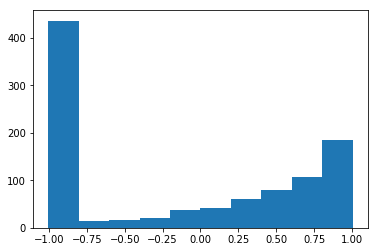

In [9]:
# plotting the value of rho_b, which we assumed to be equal to 1
fig, axes = plt.subplots()
axes.hist(rhob_toys)
plt.show()

$\rho_b$, which we assumed equal to 1, is actually found to take a range of values between -1 and 1, when we tune it toy-by-toy to match the BLUE estimate to the MLE!

## Bonus 2: drawing covariance ellipses
We will visualise the covariance matrices as ellipses, as seen in the lecture slides. This is a graphical way to see the combination of the two lines $L_1$ and $L_2$. We could show that, in our case, doing a global fit of the six measurements is equivalent to simply "combining the two lines" directly, i.e. considering the likelihood built from the joint pdf of $(\hat{a}_1, \hat{b}_1; \hat{a}_2, \hat{b}_2)$ (each of which being normal, with the covariance matrix which we have computed).

In [10]:
# first some function definitions, required for drawing the ellipses

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# see https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html
def confidence_ellipse(centre, cov, ax, n_std=1.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    pearson = cov[0][1]/np.sqrt(cov[0][0] * cov[1][1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0,0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0][0]) * n_std
    mean_x = centre[0]

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1][1]) * n_std
    mean_y = centre[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def draw_ellipse(mle1,mle2,mle12):
    V1 = sl_MLE_var(xx1,yy1)
    V2 = sl_MLE_var(xx2,yy2)
    V12 = sl_MLE_var(xx12,yy12)
    
    fix, axes = plt.subplots()
    confidence_ellipse(mle1,V1,axes,edgecolor='blue',label='L1')
    confidence_ellipse(mle2,V2,axes,edgecolor='red',label='L2')
    confidence_ellipse(mle12,V12,axes,edgecolor='black',label='L12')
    axes.scatter(mle1[0], mle1[1], c='blue', s=3)
    axes.scatter(mle2[0], mle2[1], c='red', s=3)
    axes.scatter(mle12[0], mle12[1], c='black', s=3)
    axes.legend()
    axes.set_xlabel('a')
    axes.set_ylabel('b')
    plt.show()

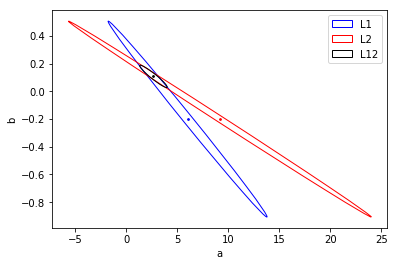

In [11]:
# draw the ellipses for the case in the text of the exercise
draw_ellipse(mle1,mle2,mle12)

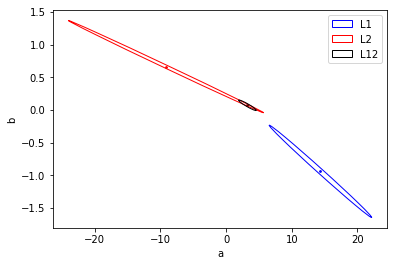

In [12]:
# draw the ellipses for any of our toys
i=0
draw_ellipse(a1toys_mle[i],a2toys_mle[i],atoys_mle[i])

In [13]:
# we can also draw the lines
def drawlines(mle1,mle2,mle12):
    xvals = np.linspace(-10,50,100)
    yvals1 = mle1[0] + mle1[1]*xvals
    yvals2 = mle2[0] + mle2[1]*xvals
    yvals12 = mle12[0] + mle12[1]*xvals
    det1x = [np.mean(xx1),np.mean(xx1)]
    det1y = [-5,10]
    det2x = [np.mean(xx2),np.mean(xx2)]
    det2y = [-5,10]
    
    fig, ax = plt.subplots()
    ax.plot(xvals,yvals1,color='blue',label="L1")
    ax.plot(xvals,yvals2,color='red',label="L2")
    ax.plot(xvals,yvals12,color='black',label="L12")
    ax.plot(det1x,det1y,'--',color='black')
    ax.plot(det2x,det2y,'--',color='black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ybound(-5,10)
    ax.legend()
    plt.show()

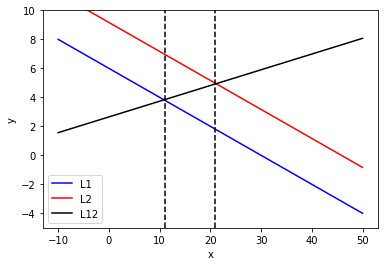

In [14]:
drawlines(mle1,mle2,mle12)